# 04 - EDA

In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Setup & Load Data

In [24]:
df = pd.read_csv("../data/processed/rentals_features.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  0 non-null      float64
 1   price                  89 non-null     float64
 2   sqft                   89 non-null     float64
 3   bedrooms               89 non-null     float64
 4   bathrooms              89 non-null     float64
 5   address                89 non-null     object 
 6   neighbourhood          0 non-null      float64
 7   url                    0 non-null      float64
 8   source                 0 non-null      float64
 9   url_canon              0 non-null      float64
 10  address_norm           89 non-null     object 
 11  unit                   4 non-null      float64
 12  source_rank            89 non-null     int64  
 13  variant_id             89 non-null     object 
 14  lat                    89 non-null     float64
 15  lon     

,title,price,sqft,bedrooms,bathrooms,neighbourhood,url,source,url_canon,unit,source_rank,lat,lon,dist_km_to_station,price_per_sqft,sqft_per_bed,bed_bath_ratio,rooms_total,dist_km_to_university,distance_to_union
count,0.0,89.000000,89.000000,89.000000,89.000000,0.0,0.0,0.0,0.0,4.000000,89.0,89.000000,89.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,89.000000
mean,NaN,2473.483146,706.617978,1.449438,1.146067,NaN,NaN,NaN,NaN,1090.750000,999.0,43.701765,-79.390690,1.483192,3.604852,525.068561,1.286517,2.595506,4.408994,8.949620
std,NaN,529.098356,178.096023,0.630859,0.355175,NaN,NaN,NaN,NaN,1946.251846,0.0,0.048874,0.067597,1.477906,0.712061,141.753926,0.493639,0.868896,2.432700,5.160656
min,NaN,950.000000,338.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,5.000000,999.0,43.601868,-79.616638,0.079595,1.357143,267.500000,0.000000,1.000000,0.216377,1.263594
25%,NaN,2100.000000,576.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,15.500000,999.0,43.656907,-79.429733,0.454160,3.061224,400.000000,1.000000,2.000000,2.997125,5.846754
50%,NaN,2400.000000,680.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,178.500000,999.0,43.697177,-79.392026,1.278814,3.629032,510.500000,1.000000,2.000000,4.174651,7.996892
75%,NaN,2750.000000,799.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,1253.750000,999.0,43.744853,-79.342936,1.976535,4.135593,600.000000,2.000000,3.000000,5.942156,14.158700
max,NaN,4200.000000,1250.000000,4.000000,2.000000,NaN,NaN,NaN,NaN,4001.000000,999.0,43.809546,-79.254020,9.890629,5.295858,950.000000,3.000000,6.000000,10.730401,21.569431


## 2) Unvariate Analysis

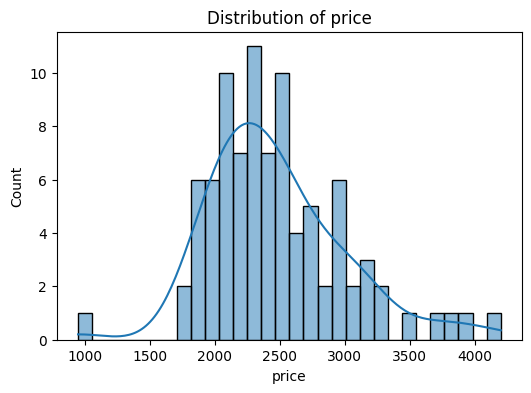

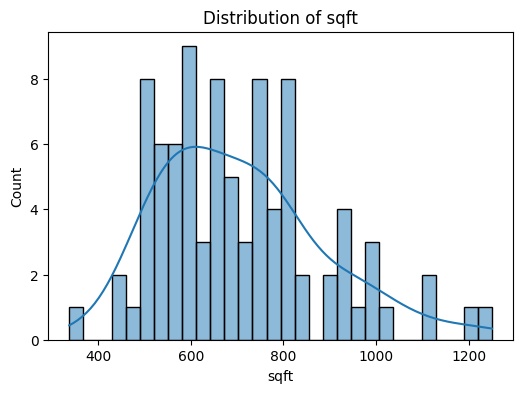

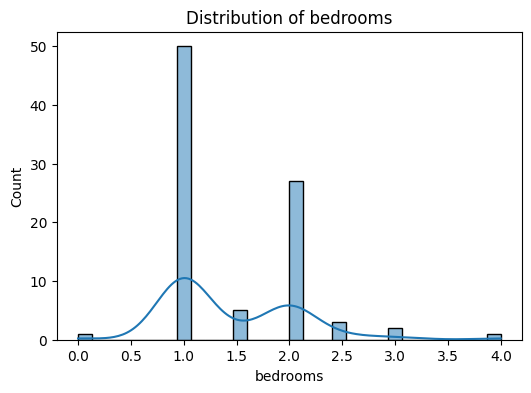

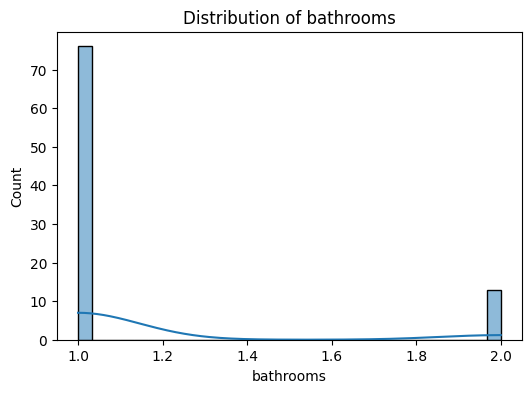

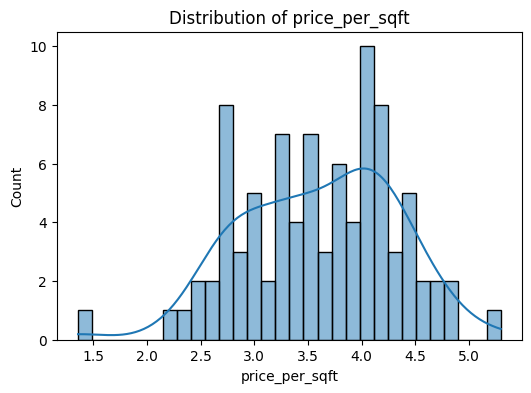

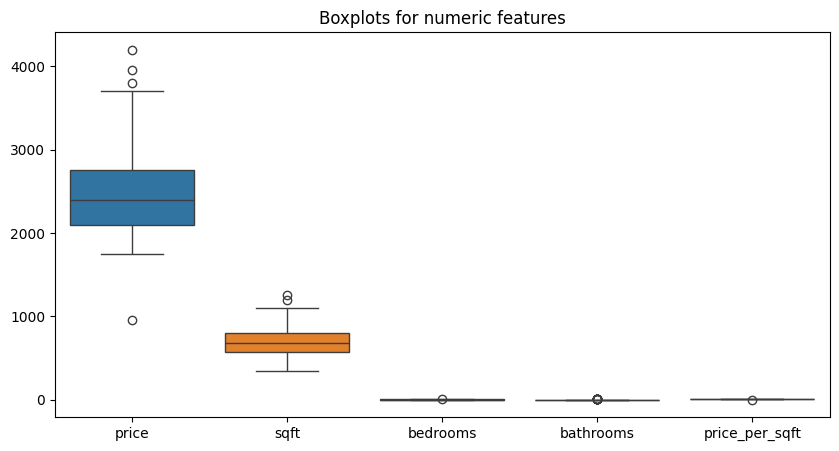

In [25]:
num_cols = ["price", "sqft", "bedrooms", "bathrooms", "price_per_sqft"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots (spot outliers visually)
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots for numeric features")
plt.show()


Price

- The distribution is right-skewed, with most listings between $1800–$2800.

- A few apartments reach $4000+, which are likely valid but rare luxury units → we keep them.

- One listing at $1000 is suspicious (possibly just a room or erroneous), so we remove outliers with price < $1200.

Sqft

- The distribution is fairly normal, centered around 500–800 sqft, with a slight right skew.

- No extreme outliers are present → we keep all sqft values.

Bathrooms

- Almost all listings have 1 bathroom, with a smaller group having 2 bathrooms.

- This feature has low variance, so it may add limited predictive value.

- Still, we keep it for completeness and also derive an additional feature bed_bath_ratio.

Price per sqft

- Most listings fall in the $2.5–$4.5/sqft range, which is consistent with Toronto market rates.

- A few listings below $2/sqft or above $5/sqft are likely errors or anomalies.

- We remove outliers where price_per_sqft < 2 or > 5.

In [26]:
df = df[df['price'] >= 1200]
df = df[(df["price_per_sqft"] >= 2) & (df["price_per_sqft"] <= 5)]

## 3) Bivariate Analysis

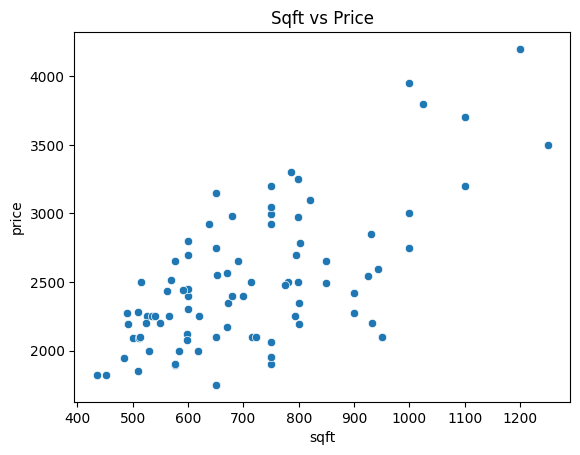

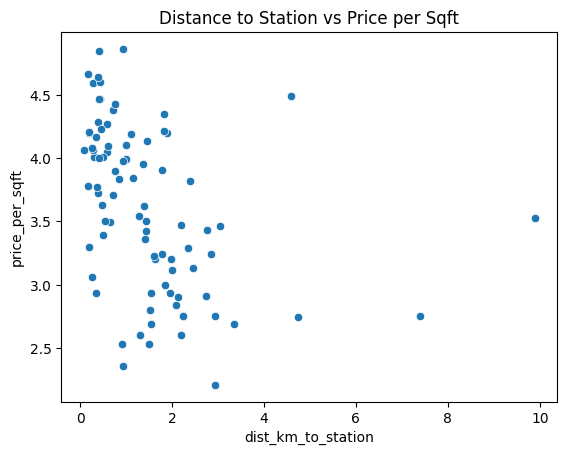

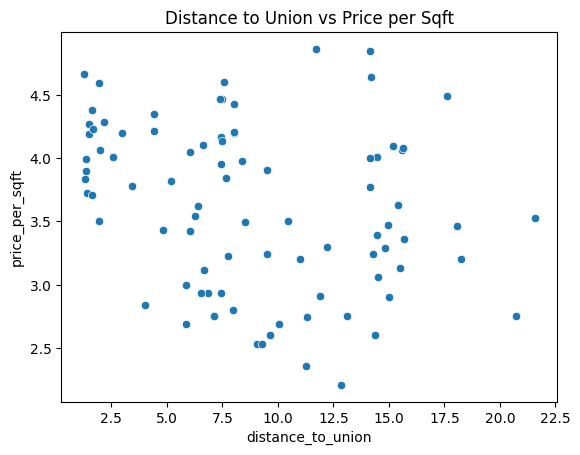

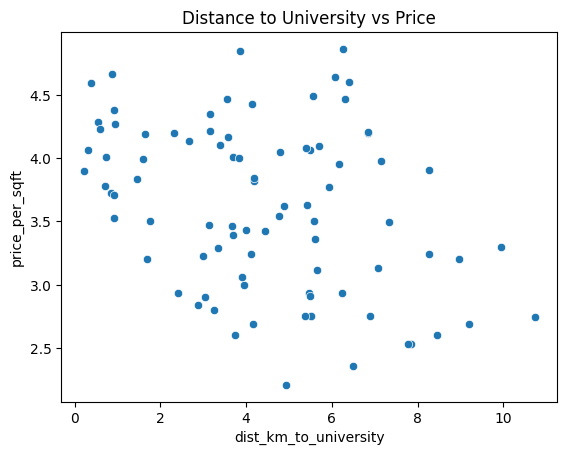

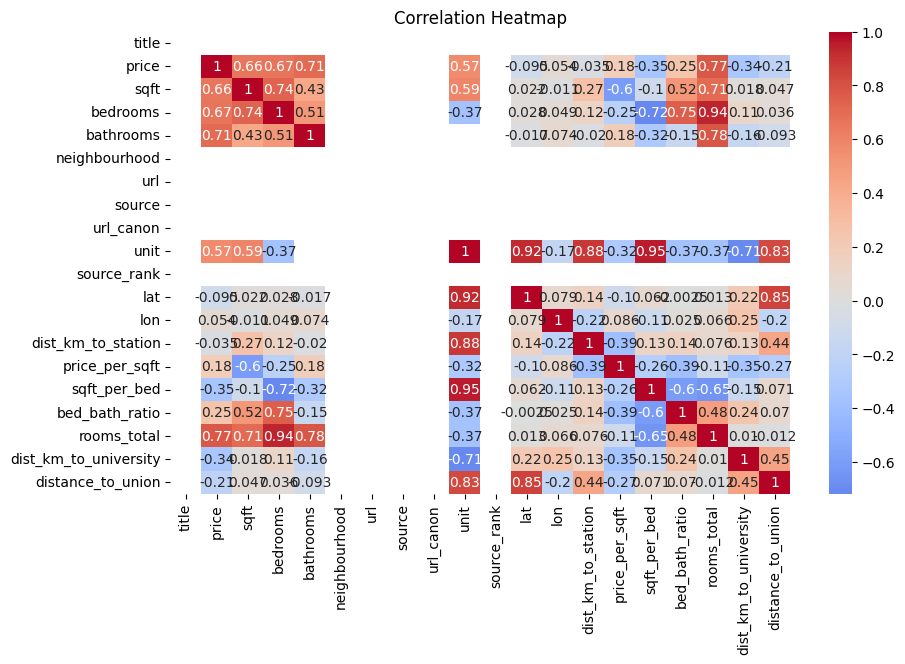

In [29]:
# Scatterplots
sns.scatterplot(x="sqft", y="price", data=df)
plt.title("Sqft vs Price")
plt.show()

sns.scatterplot(x="dist_km_to_station", y="price_per_sqft", data=df)
plt.title("Distance to Station vs Price per Sqft")
plt.show()
sns.scatterplot(x="distance_to_union", y="price_per_sqft", data=df)
plt.title("Distance to Union vs Price per Sqft")
plt.show()

if "dist_km_to_university" in df.columns:
    sns.scatterplot(x="dist_km_to_university", y="price_per_sqft", data=df)
    plt.title("Distance to University vs Price")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Sqft vs Price

- Clear positive trend: larger apartments generally cost more.

- However, the relationship isn’t perfectly linear — units of similar size can have different prices.

- This means size explains part of the variation, but location and other factors also play an important role.

Distance to Nearest Subway Station vs Price per Sqft

- Apartments within 0–1 km of a subway station often rent at $3.5–4.5 per sqft.

- As distance increases, rent per sqft drops, with most units beyond 2 km falling below $3.5/sqft.

- The effect is strongest within the first 2 km, after which prices stabilize lower.

- Outliers (8–10 km but still high priced) are likely anomalies or rare luxury units.

Distance to Union Station vs Price per Sqft

- General negative trend: closer to downtown (Union) → higher price per sqft.

- Relationship is noisier and less linear than subway proximity, reflecting neighborhood variation, but still shows that downtown access commands a premium.

Distance to University vs Price per Sqft

- Apartments within 0–3 km of a university often achieve $3.8–4.5 per sqft.

- Beyond 6+ km, more apartments fall into the $2.5–3.2/sqft range.

- The trend is weaker and noisier than subway/downtown distance, likely because not all renters are students, so proximity to universities is only a secondary factor.

Correlation Heatmap

- Unit size (sqft, bedrooms, bathrooms) is strongly associated with rent price.

- Location-based features show negative correlations with rent efficiency:

  - Distance to subway: -0.39

  - Distance to Union: -0.27

  - Distance to university: weaker at -0.11

- Strong correlations exist among sqft, bedrooms, and rooms_total, indicating multicollinearity.

- This suggests tree-based models (Random Forest, Gradient Boosted Trees) may perform better than plain linear regression, unless features are carefully selected.

## 4) Categorical / Grouped Analysis

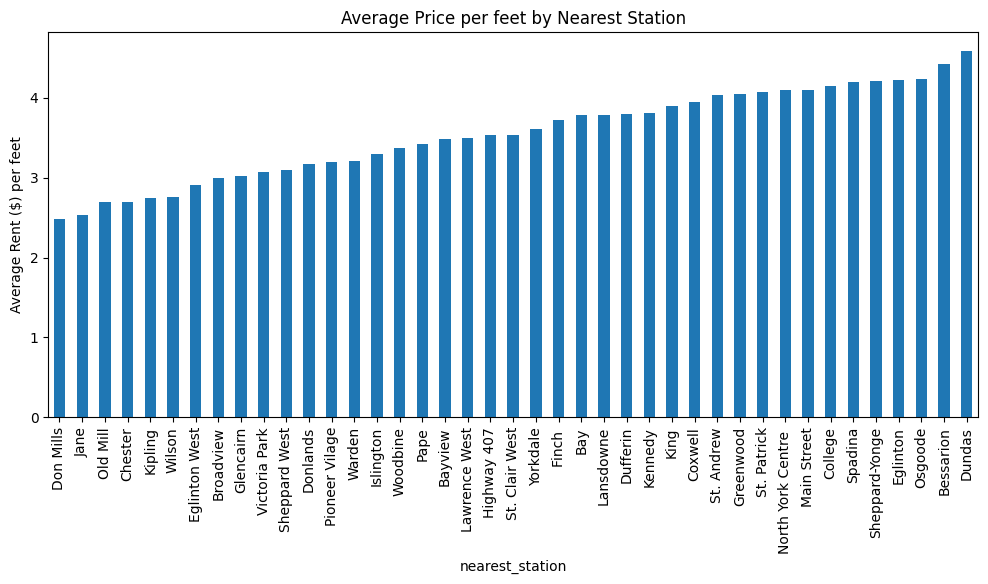

In [35]:
plt.figure(figsize=(12,5))
df.groupby("nearest_station")["price_per_sqft"].mean().sort_values().plot(kind="bar")
plt.title("Average Price per feet by Nearest Station")
plt.ylabel("Average Rent ($) per feet")
plt.show()


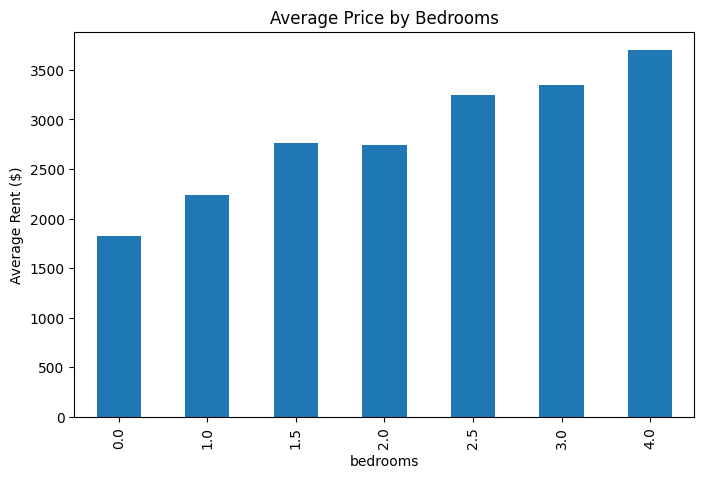

In [31]:
plt.figure(figsize=(8,5))
df.groupby("bedrooms")["price"].mean().plot(kind="bar")
plt.title("Average Price by Bedrooms")
plt.ylabel("Average Rent ($)")
plt.show()


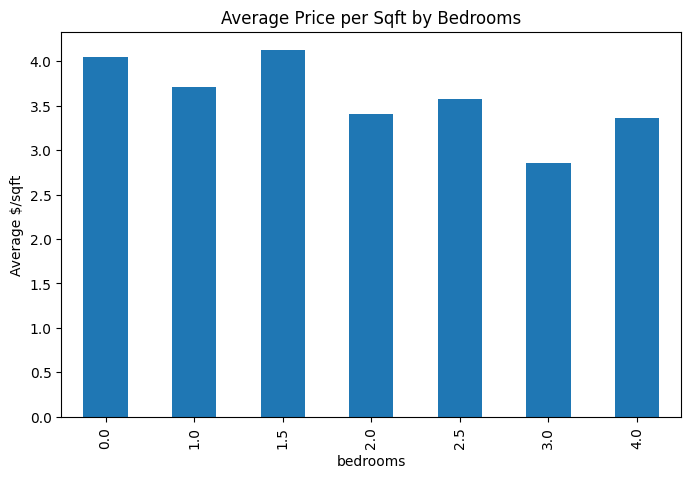

In [32]:
plt.figure(figsize=(8,5))
df.groupby("bedrooms")["price_per_sqft"].mean().plot(kind="bar")
plt.title("Average Price per Sqft by Bedrooms")
plt.ylabel("Average $/sqft")
plt.show()


Average rent per square foot varies significantly by subway station. Outer stations such as Don Mills and Jane average $2.5–2.7/sqft, while central stations such as Dundas and Osgoode reach $4.5+/sqft. This demonstrates that proximity to central TTC stations is strongly associated with higher rent efficiency, making price_per_sqft a more reliable measure of location impact than raw rent price.
Average rent increases consistently with the number of bedrooms, from ~$1800 for studios to ~$3700+ for 4-bedroom units. This confirms that bedroom count is a strong driver of total rent. However, when considering efficiency (price per square foot), smaller units tend to command higher rates, reflecting the premium for compact apartments in central locations.
While total rent increases with more bedrooms, price per square foot shows the opposite trend. Studios and 1-bedroom apartments average ~$4/sqft, while larger units (3–4 bedrooms) drop closer to $3/sqft. This reflects an ‘economy of scale’: smaller units are relatively more expensive per unit area due to higher demand in dense, central neighborhoods, while larger units become more affordable on a per-foot basis.


## 6) Geospatial visuals

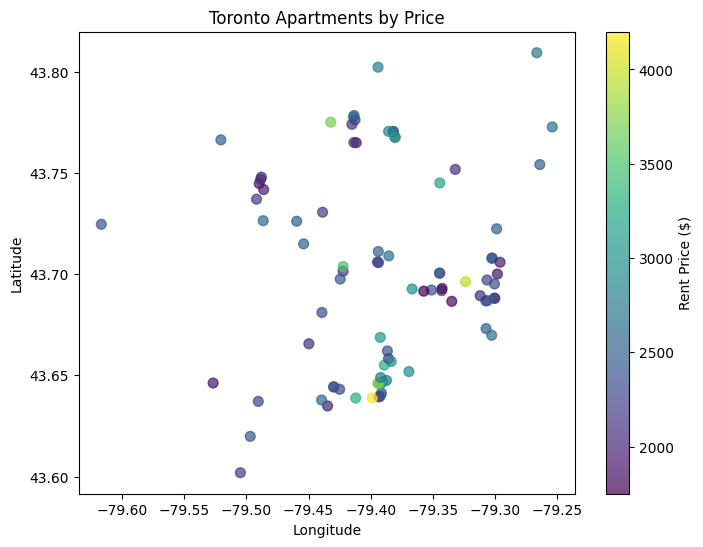

In [38]:
plt.figure(figsize=(8,6))
sc = plt.scatter(df["lon"], df["lat"], c=df["price"], cmap="viridis", s=50, alpha=0.7)
plt.colorbar(sc, label="Rent Price ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Toronto Apartments by Price")
plt.show()


In [40]:
import folium
import branca.colormap as cm

# Center map around Toronto
m = folium.Map(location=[43.65, -79.38], zoom_start=11)

# Create color scale based on price per sqft
min_pps, max_pps = df["price_per_sqft"].min(), df["price_per_sqft"].max()
colormap = cm.LinearColormap(colors=["blue", "green", "orange", "red"],
                             vmin=min_pps, vmax=max_pps)
colormap.caption = "Rent Price per Sqft ($/sqft)"

# Add apartments as circle markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5,
        color=None,
        fill=True,
        fill_color=colormap(row["price_per_sqft"]),  # use price per sqft
        fill_opacity=0.7,
        popup=f"${row['price']} total | {row['sqft']} sqft | {row['price_per_sqft']:.2f} $/sqft"
    ).add_to(m)

# Add the color legend
colormap.add_to(m)

# Save
m.save("toronto_apartments_map_pps.html")


## 7) Insights / Notes